# Customer Churn Prediction Using ANN

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Statistical analysis of the numercial features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()


0

**First of all, drop customerID column as it is of no use**

In [9]:
df.drop('customerID',axis='columns',inplace=True)


In [10]:
df.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above, TotalCharges should be float but it is an object.**

In [11]:
df.TotalCharges.values


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
##df['TotalCharges']=pd.to_numeric(df.TotalCharges)
## Above code gave error because it contain actual string values


In [13]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

**Some values seems to be not numbers but blank string.**

In [14]:
empty_TotalCharges = df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] ## errors='coerce' will return invalid parsing.
empty_TotalCharges

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df.shape


(7043, 20)

In [16]:
len(empty_TotalCharges)

11

**There are only 11 rows with such space. Remove rows with space in TotalCharges**

In [17]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


<ipython-input-19-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [20]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
df1.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
df1.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<AxesSubplot:>

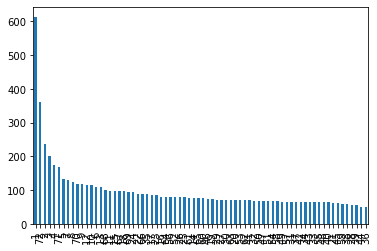

In [23]:
df1.tenure.value_counts().plot(kind='bar')

In [24]:
df1.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [25]:
df1.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**This dataset is Imbalance Dataset,will deal with it.**

#### Data Visualization



In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

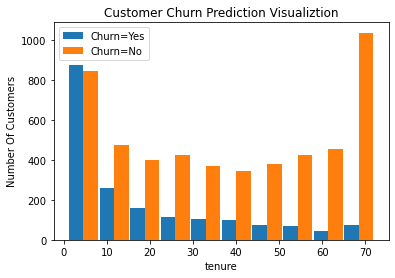

In [27]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend(loc='best')
plt.show()

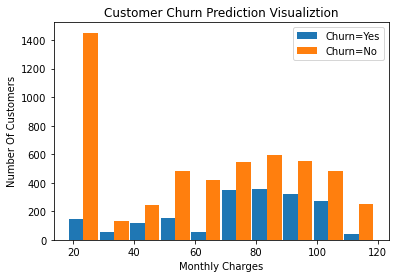

In [28]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95,label=['Churn=Yes','Churn=No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend(loc='best')
plt.show()

In [29]:
num_columns=['tenure','MonthlyCharges','TotalCharges']

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


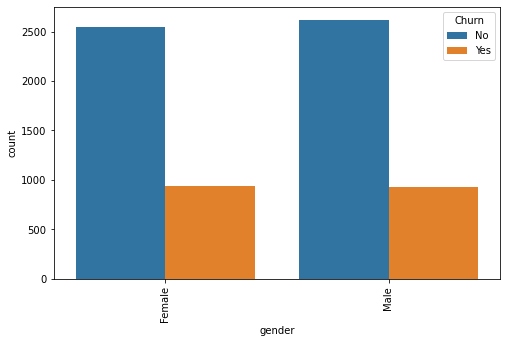

In [38]:
#visualizing count of Variable based on Churn value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['gender'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


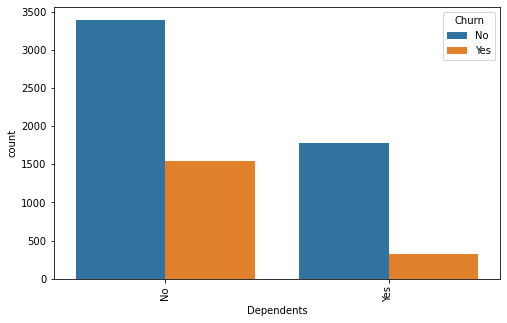

In [37]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['Dependents'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


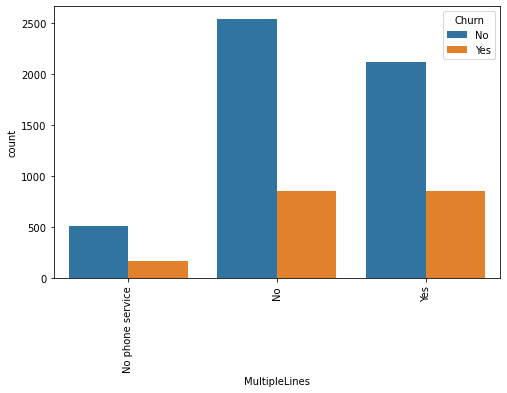

In [36]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['MultipleLines'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


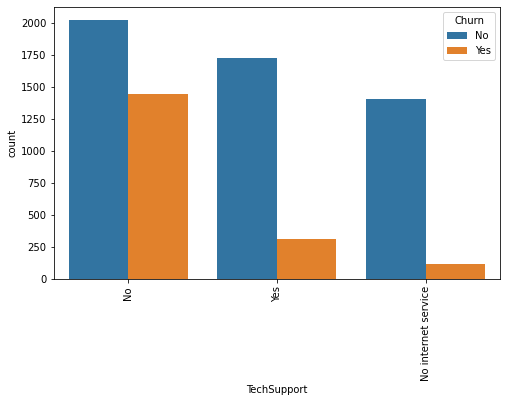

In [39]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['TechSupport'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


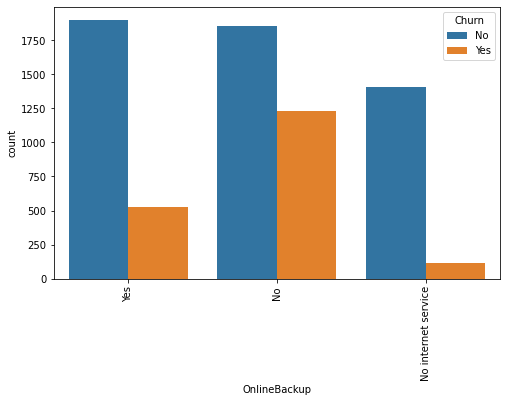

In [40]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['OnlineBackup'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


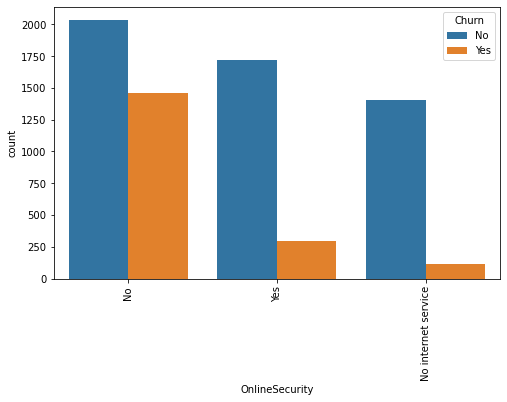

In [41]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['OnlineSecurity'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


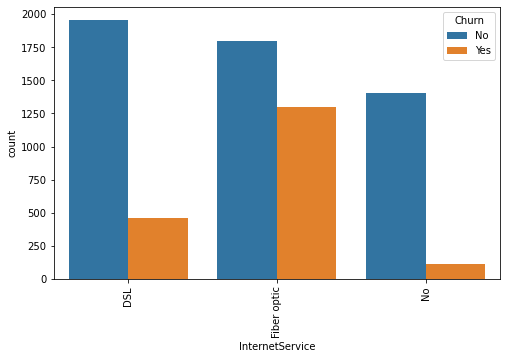

In [42]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['InternetService'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


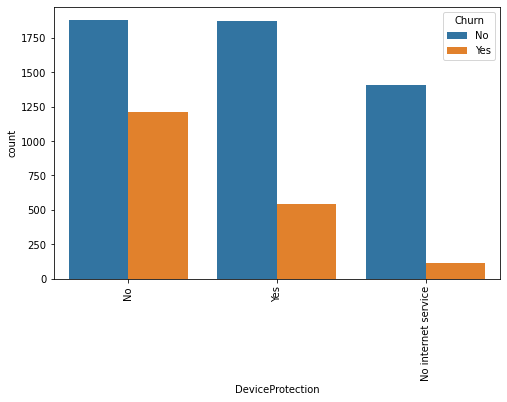

In [43]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['DeviceProtection'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


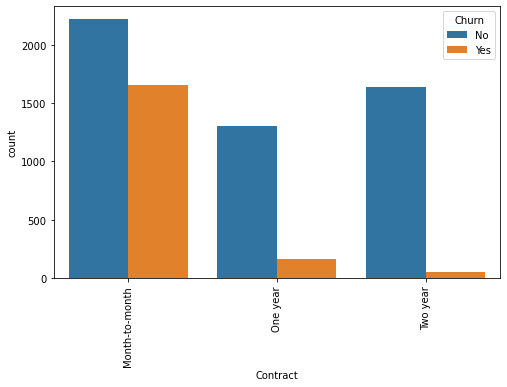

In [44]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['Contract'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


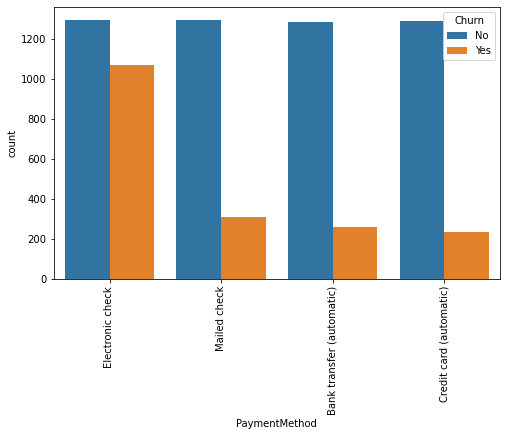

In [45]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(8,5))
s1=sns.countplot(df1['PaymentMethod'], hue=df1.Churn)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<ipython-input-46-9f4e516394fe>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)


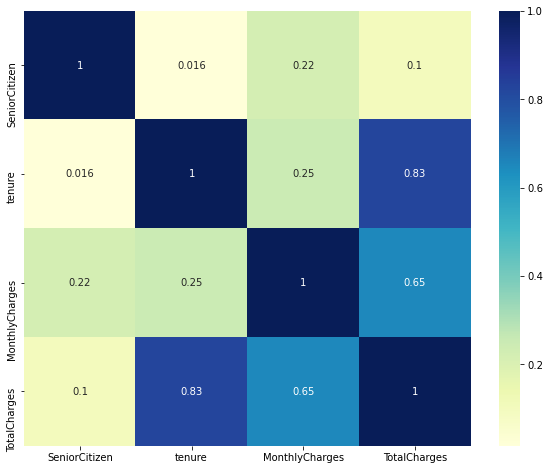

In [46]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [47]:
def print_unique_col_values(X):
       for column in X:
            if X[column].dtypes=='object':
                print(f'{column}: {X[column].unique()}') 


In [48]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service along with YES/NO, that can be replaced with a simple No.**


In [49]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

<ipython-input-49-104b877f3854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-49-104b877f3854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [50]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


#### Data Preparation

In [51]:
###Converting Yes and No to 1 or 0

dummy_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in dummy_col:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)


<ipython-input-51-bb94457b1ba9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [52]:
## Dealing with gender column
df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)

<ipython-input-52-d98890e00db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)


In [53]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [54]:
print_unique_col_values(df1)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


**Now we left with these columns will do one_hot_encoding**

In [55]:
columns=['InternetService','Contract','PaymentMethod']

In [56]:
df1["InternetService"].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [57]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [58]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [59]:
df2['TotalCharges'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
25%       401.450000
50%      1397.475000
75%      3794.737500
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64

In [60]:
df2['MonthlyCharges'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
5%         19.650000
25%        35.587500
50%        70.350000
75%        89.862500
90%       102.645000
95%       107.422500
99%       114.734500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [61]:
df2['tenure'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
5%          1.000000
25%         9.000000
50%        29.000000
75%        55.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64

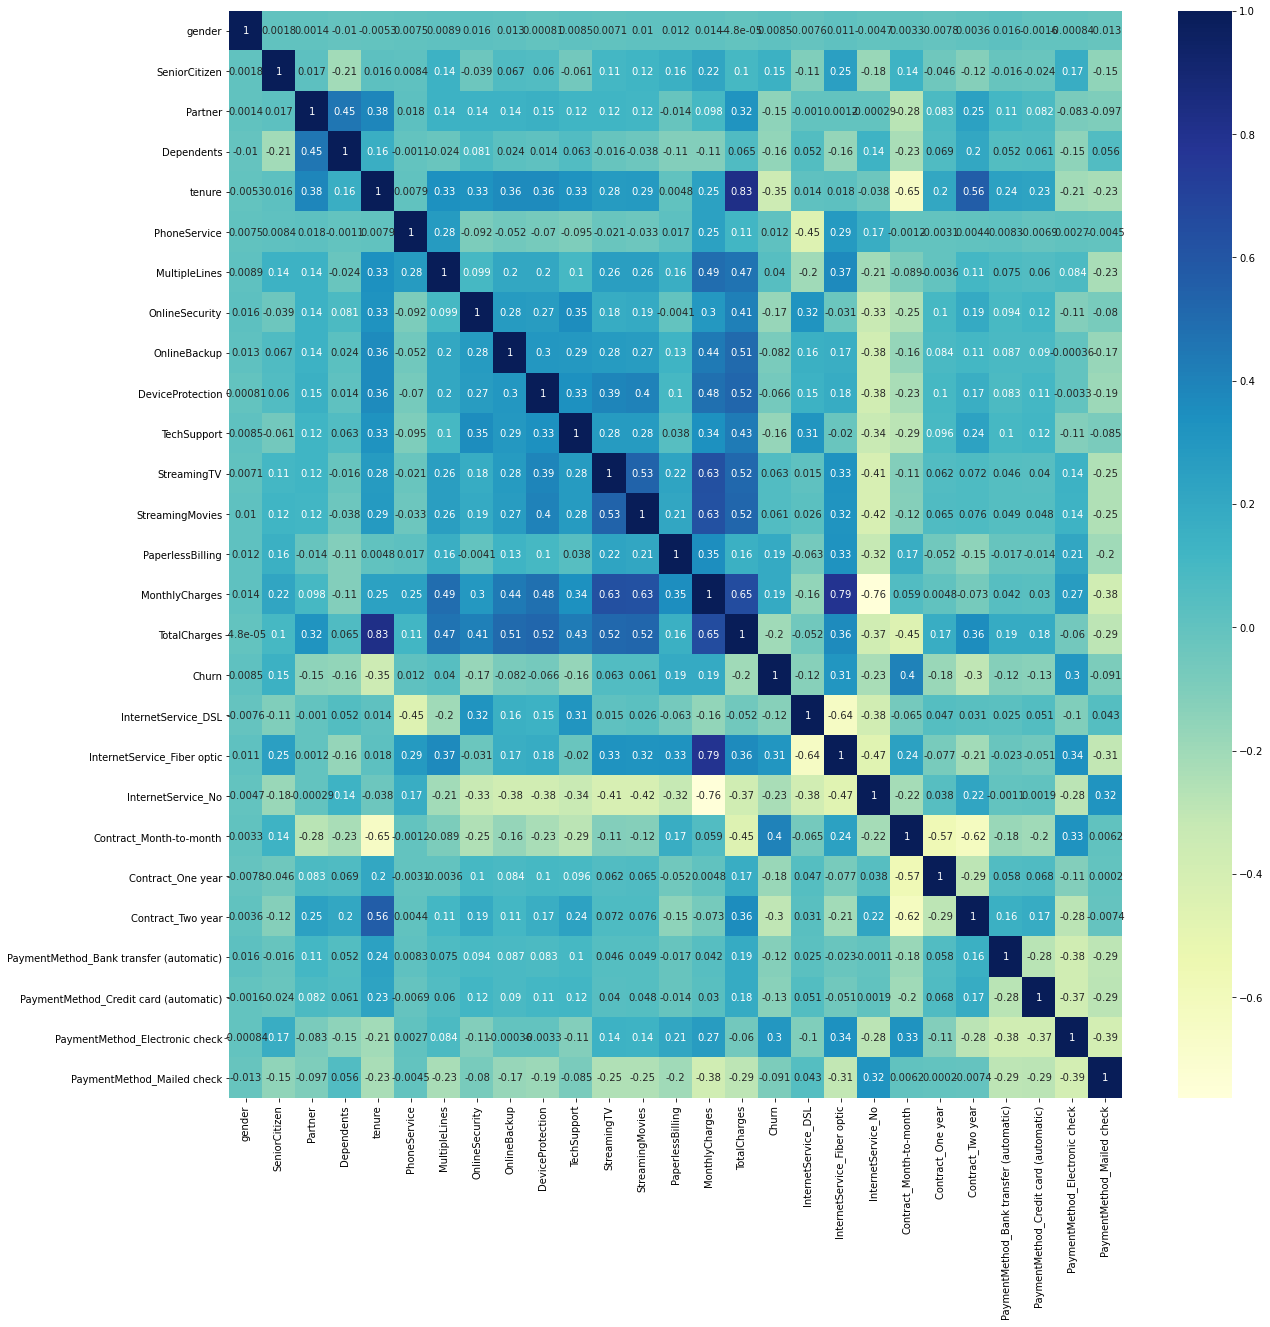

In [64]:
# heatmap
plt.figure(figsize=(20,20))

sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.show()

0    73.421502
1    26.578498
Name: Churn, dtype: float64


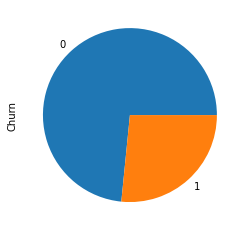

In [66]:
###lets find out churn/non churn percentage
print((df2['Churn'].value_counts()/len(df2))*100)
((df2['Churn'].value_counts()/len(df2))*100).plot(kind="pie")
plt.show()

**As we can see that 73% of the customers do not churn, there is a class of imbalance**

### Feature Scaling

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[num_columns] = scaler.fit_transform(df2[num_columns])

#### Train test split



In [68]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

#### Data Imbalance Handling
**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [70]:
y_train_sm.value_counts()

1    4164
0    4164
Name: Churn, dtype: int64

In [71]:
X_train_sm.shape,X_test.shape

((8328, 26), (1407, 26))

In [72]:
y_train_sm.shape,y_test.shape

((8328,), (1407,))

In [74]:
len(X_train_sm.columns)

26

### Build a model (ANN) in tensorflow/keras



In [75]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU

In [197]:
model= Sequential()
model.add(Dense(11,activation="relu")) ## 11 features so units = 11,input layer
model.add(Dense(7,activation='relu')) ## 1st hidden layer
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu')) ## 2nd hidden 
model.add(Dropout(0.3))
model.add(Dense(11,activation='relu')) # 3rd hidden layer
model.add(Dense(1,activation='sigmoid')) # output layer


In [198]:
# Initiating model  -- by default learning rate = 0.01

model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

#### ANN (Trianing Neural Network)


In [199]:
stopping = EarlyStopping(monitor='val_accuracy', patience=10,restore_best_weights=False,start_from_epoch=0)

In [200]:
model_history = model.fit(X_train_sm,y_train_sm,validation_split=0.33,epochs=100,callbacks=stopping)

Epoch 1/100
175/175 [==============================] - 3s 6ms/step - loss: 0.5535 - accuracy: 0.7206 - val_loss: 1.0292 - val_accuracy: 0.0116
Epoch 2/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4905 - accuracy: 0.7415 - val_loss: 0.9853 - val_accuracy: 0.0116
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4713 - accuracy: 0.7446 - val_loss: 0.9321 - val_accuracy: 0.0149
Epoch 4/100
175/175 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7650 - val_loss: 0.9950 - val_accuracy: 0.4143
Epoch 5/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4546 - accuracy: 0.7695 - val_loss: 0.9389 - val_accuracy: 0.5020
Epoch 6/100
175/175 [==============================] - 1s 6ms/step - loss: 0.4482 - accuracy: 0.7759 - val_loss: 0.8596 - val_accuracy: 0.6166
Epoch 7/100
175/175 [==============================] - 1s 5ms/step - loss: 0.4482 - accuracy: 0.7785 - val_loss: 0.8506 - val_accuracy: 0.6086

In [201]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 11)                297       
                                                                 
 dense_46 (Dense)            (None, 7)                 84        
                                                                 
 dropout_14 (Dropout)        (None, 7)                 0         
                                                                 
 dense_47 (Dense)            (None, 10)                80        
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_48 (Dense)            (None, 11)                121       
                                                                 
 dense_49 (Dense)            (None, 1)                

In [202]:
model.evaluate(X_test, y_test)


44/44 [==============================] - 0s 4ms/step - loss: 0.4461 - accuracy: 0.7811


[0.4460771381855011, 0.7810945510864258]

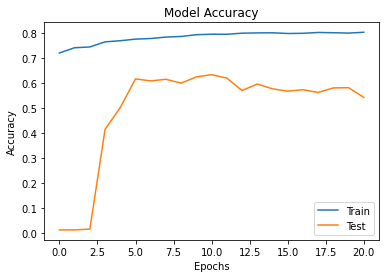

In [203]:
# plot summarize history for accuracy & val_score

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='best')
plt.show()

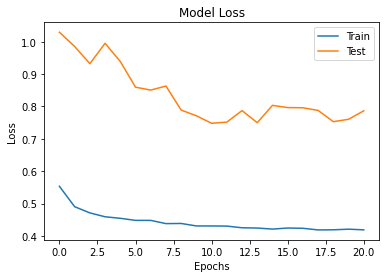

In [204]:
# plot summarize history for loss & val_loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='best')
plt.show()

In [205]:
## Prediction & Evaluation

y_pred = model.predict(X_test)
y_pred =np.where(y_pred > 0.5,1, 0)

44/44 [==============================] - 1s 5ms/step


In [206]:
## Evaluating 

from sklearn.metrics import  accuracy_score, confusion_matrix , classification_report



In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.49      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [209]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[900,  99],
       [209, 199]])

Text(69.0, 0.5, 'Truth')

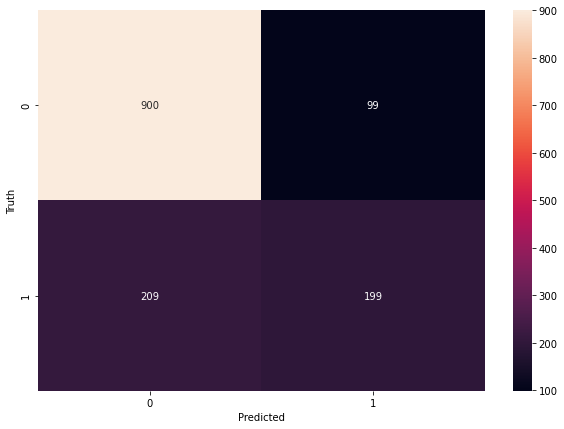

In [211]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [230]:
score= accuracy_score(y_test,y_pred)
score

0.7810945273631841

#### Precision 

In [233]:
from sklearn.metrics import precision_score,recall_score,f1_score
pre_score = precision_score(y_test,y_pred)
pre_score

0.6677852348993288

#### Recall

In [234]:
r_score = recall_score(y_test,y_pred)
r_score

0.4877450980392157

In [236]:
f_score = f1_score(y_test,y_pred)
f_score

0.5637393767705382